<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Naive_Bayes_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. 

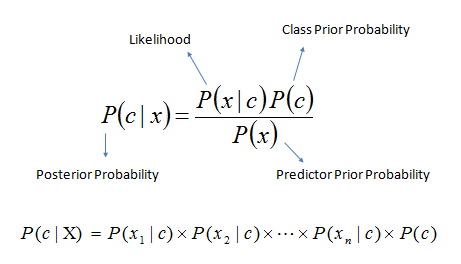


    P(c): the probability of hypothesis c being true (regardless of the data). This is known as the prior probability of c.
    P(x): the probability of the data (regardless of the hypothesis). This is known as the prior probability.
    P(c|x): the probability of hypothesis c given the data x. This is known as posterior probability.
    P(x|c): the probability of data x given that the hypothesis c was true. This is known as posterior probability.



    Step 1: Calculate the prior probability for given class labels
    Step 2: Find Likelihood probability with each attribute for each class
    Step 3: Put these value in Bayes Formula and calculate posterior probability.
    Step 4: See which class has a higher probability, given the input belongs to the higher probability class.


For a complete example showing Step 1 through Step 4, see https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

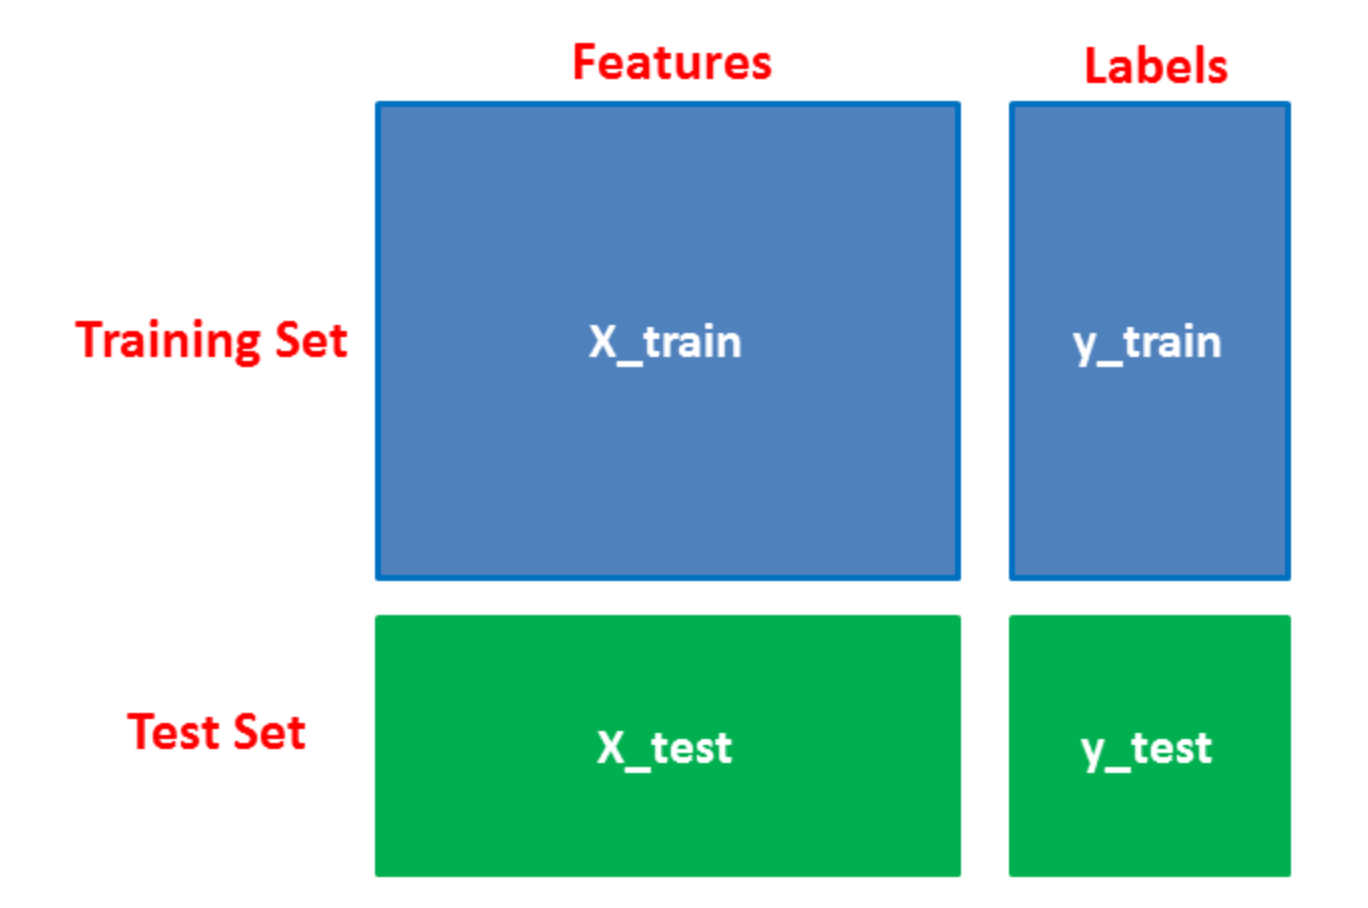

In [24]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# As with the earlier example with logistic regression classifier, 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_train_counts_, news_train.target, test_size=0.3,random_state=1) 

In [25]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


In [28]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,   7],
       [  4, 173]])

Text(0.5, 257.44, 'Predicted label')

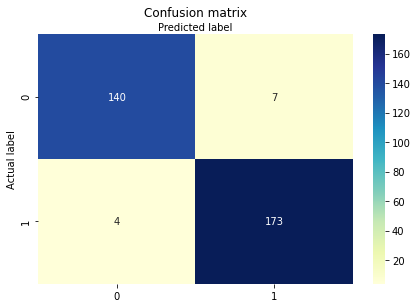

In [30]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#this is a different plotting package
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='binary'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='binary'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='binary'))))

Accuracy:      0.9660493827160493  
Precision:     0.9611111111111111  
Recall:        0.9774011299435028  
f1 score:      0.9691876750700281  


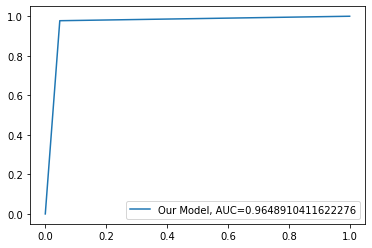

In [34]:
#source: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Our Model, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

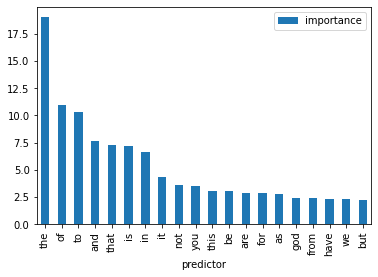

In [57]:
predict_score_NB = list(zip(count_vect.get_feature_names(), gnb.theta_[1]))
predict_score_sorted_NB = sorted(predict_score_NB, key=lambda tup: tup[1])
predictions_1 = pd.DataFrame(predict_score_sorted_NB, columns=['predictor', 'importance'])
predictions_1 = predictions_1.sort_values(['importance'], ascending=False)
#get top 10 predictors
top_preds = predictions_1.iloc[:20]
top_preds.plot(kind='bar', x='predictor', y='importance')

In [6]:
categories = ['alt.atheism', 'soc.religion.christian']

In [7]:
from sklearn.datasets import fetch_20newsgroups

news_train = fetch_20newsgroups(subset='train',categories=categories,shuffle=True, random_state=1)

In [8]:
print(news_train.target_names)

['alt.atheism', 'soc.religion.christian']


In [12]:
print(list(news_train.data))

['From: kilroy@gboro.rowan.edu (Dr Nancy\'s Sweetie)\nSubject: Re: Certainty and Arrogance\nOrganization: Rowan College of New Jersey\nLines: 122\n\nIn an earlier article, I explained that what many people find arrogant about\nChristians is that some Christians profess absolute certianty about their\nbeliefs and doctrines.  That is, many Christians insist that they CANNOT have\nmade any mistakes when discovering their beliefs, which amounts to saying\nthat they are infallible.\n\nImpicitly claiming to be infallible is pretty arrogant, most of us will\nprobably agree.\n\nIn short, the problem is that no matter how good your sources are, if any\npart of your doctrines or beliefs rest on your own thinking and reasoning,\nthen those doctrines are suspect.  So long as your own brain is involved,\nthere is a possibility for error.  I summarised the problem by writing "There\nis no way out of the loop."\n\n\nSomeone called `REXLEX\' has claimed that there IS a way out of the loop, but\nhe did

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(news_train.data)

In [23]:
X_train_counts_ = X_train_counts.toarray()

In [38]:
print(list(X_train_counts_[1]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
X_train_counts = count_vect.fit_transform(news_train.data)

##Advantages

1. It is not only a simple approach but also a fast and accurate method for prediction.
2. Naive Bayes has very low computation cost.
3. It can efficiently work on a large dataset.
4. It performs well in case of discrete response variable compared to the continuous variable.
5. It can be used with multiple class prediction problems.
6. It also performs well in the case of text analytics problems.
7. When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.


##Disadvantages

The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.